In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

df = pd.read_csv("StudentPerformanceFactors.csv")

df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## EDA

In [2]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
# Variasi dalam kolom
for col in df.columns:
    print(f"{col}: {df[col].nunique()}, {df[col].unique()}")

Hours_Studied: 41, [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Attendance: 41, [ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]
Parental_Involvement: 3, ['Low' 'Medium' 'High']
Access_to_Resources: 3, ['High' 'Medium' 'Low']
Extracurricular_Activities: 2, ['No' 'Yes']
Sleep_Hours: 7, [ 7  8  6 10  9  5  4]
Previous_Scores: 51, [ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]
Motivation_Level: 3, ['Low' 'Medium' 'High']
Internet_Access: 2, ['Yes' 'No']
Tutoring_Sessions: 9, [0 2 1 3 4 5 6 7 8]
Family_Income: 3, ['Low' 'Medium' 'High']
Teacher_Quality: 3, ['Medium' 'High' 'Low' nan]
School_Type: 2, ['Public' 'Private']
Peer_Influence:

In [5]:
df.isnull().sum().sort_values(ascending=False)


Parental_Education_Level      90
Teacher_Quality               78
Distance_from_Home            67
Hours_Studied                  0
Access_to_Resources            0
Parental_Involvement           0
Attendance                     0
Extracurricular_Activities     0
Motivation_Level               0
Internet_Access                0
Previous_Scores                0
Sleep_Hours                    0
Family_Income                  0
Tutoring_Sessions              0
School_Type                    0
Peer_Influence                 0
Learning_Disabilities          0
Physical_Activity              0
Gender                         0
Exam_Score                     0
dtype: int64

EDA Univariate - Numerical Features

In [6]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_cols


['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Exam_Score']

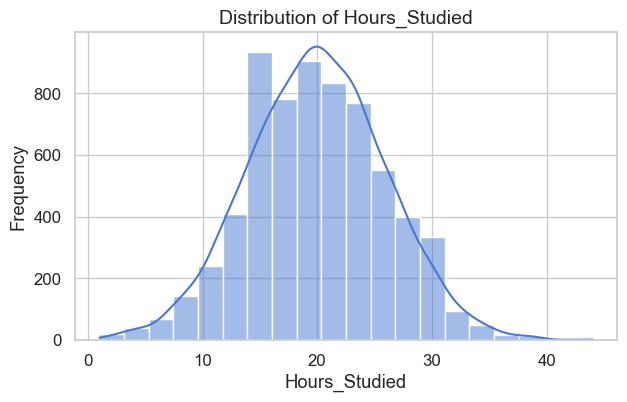

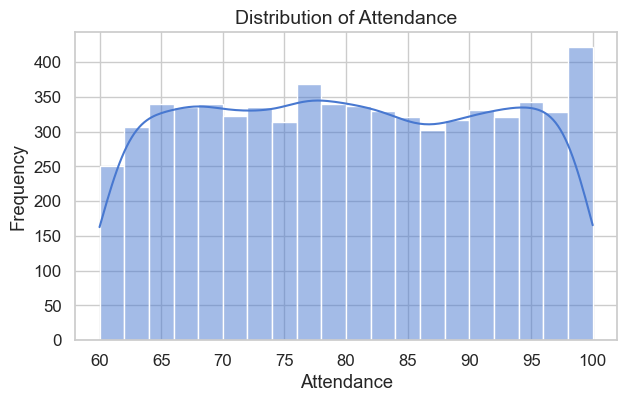

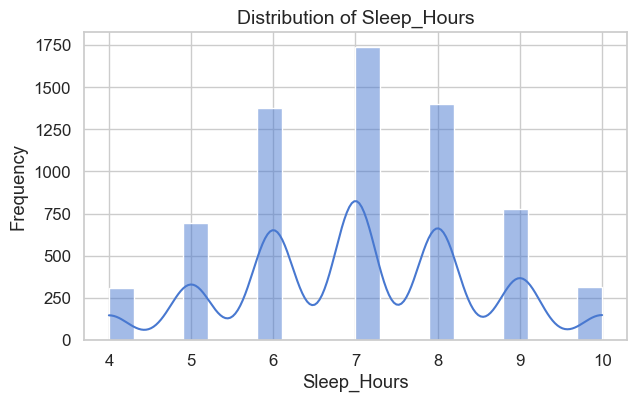

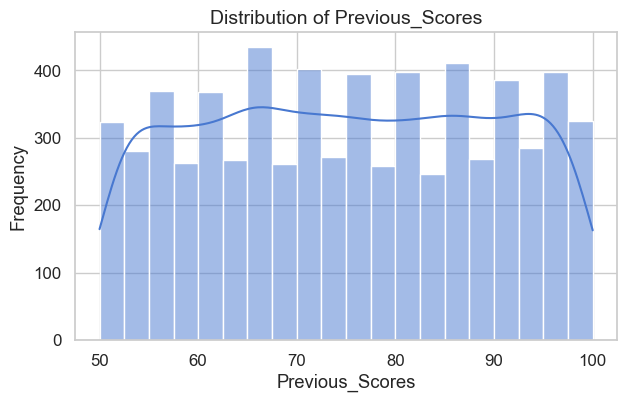

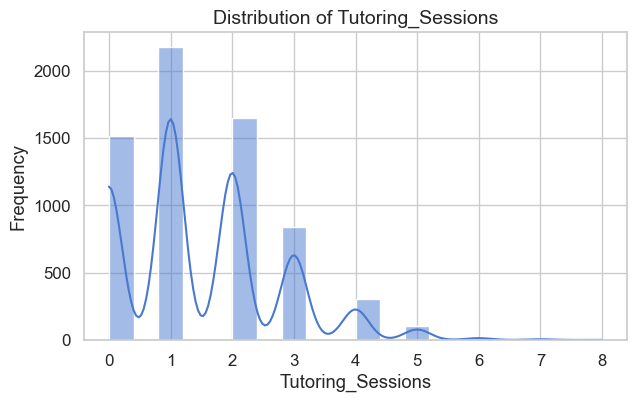

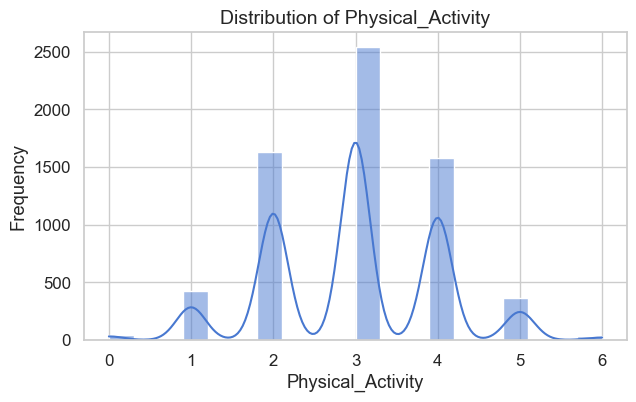

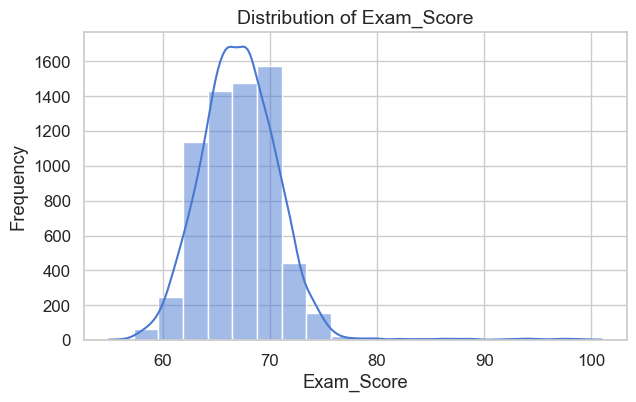

In [7]:
for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



=== Hours_Studied ===
Q1 (25%): 16.0
Q3 (75%): 24.0
IQR: 8.0
Lower Bound: 4.0
Upper Bound: 36.0
Outliers: 43 rows


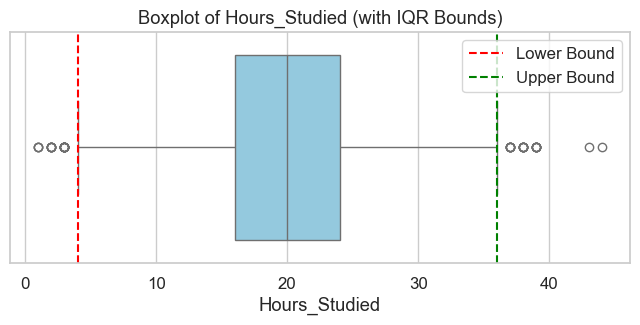


=== Attendance ===
Q1 (25%): 70.0
Q3 (75%): 90.0
IQR: 20.0
Lower Bound: 40.0
Upper Bound: 120.0
Outliers: 0 rows


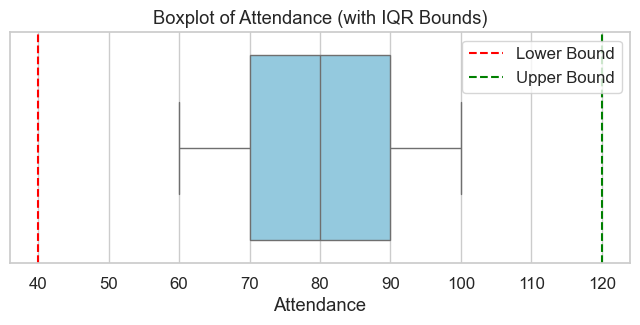


=== Sleep_Hours ===
Q1 (25%): 6.0
Q3 (75%): 8.0
IQR: 2.0
Lower Bound: 3.0
Upper Bound: 11.0
Outliers: 0 rows


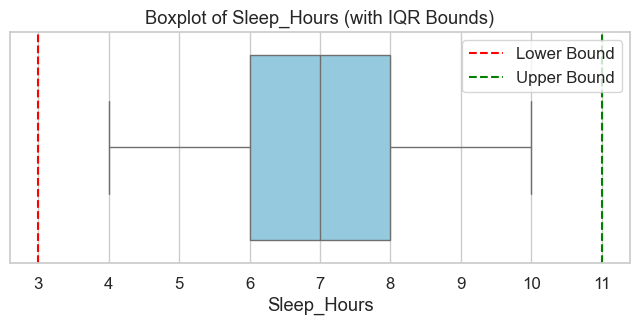


=== Previous_Scores ===
Q1 (25%): 63.0
Q3 (75%): 88.0
IQR: 25.0
Lower Bound: 25.5
Upper Bound: 125.5
Outliers: 0 rows


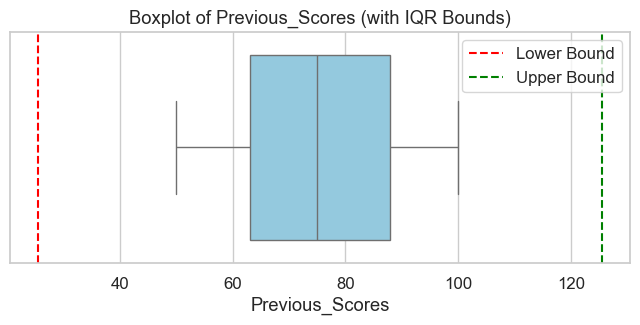


=== Tutoring_Sessions ===
Q1 (25%): 1.0
Q3 (75%): 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
Outliers: 430 rows


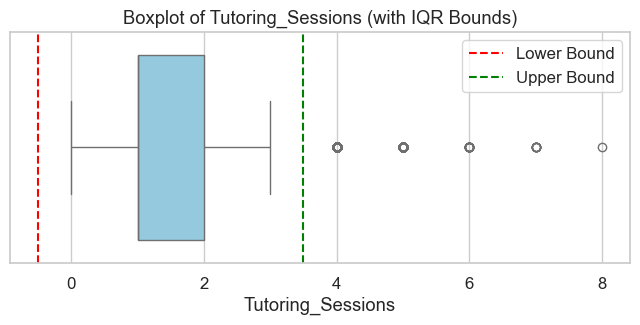


=== Physical_Activity ===
Q1 (25%): 2.0
Q3 (75%): 4.0
IQR: 2.0
Lower Bound: -1.0
Upper Bound: 7.0
Outliers: 0 rows


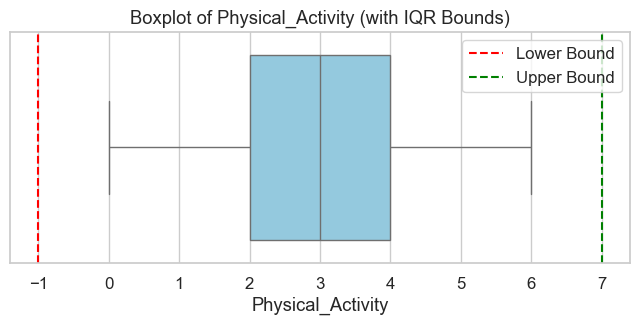


=== Exam_Score ===
Q1 (25%): 65.0
Q3 (75%): 69.0
IQR: 4.0
Lower Bound: 59.0
Upper Bound: 75.0
Outliers: 104 rows


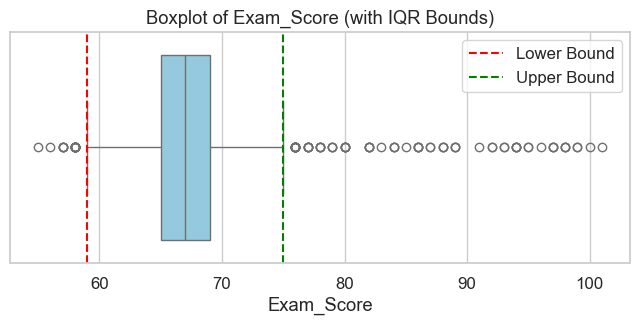

In [8]:
# CHECK OUTLIER

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\n=== {col} ===")
    print(f"Q1 (25%): {Q1}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Hitung jumlah outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers: {len(outliers)} rows")

    # Plot Boxplot dengan garis batas 
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col], color="skyblue")

    plt.axvline(lower_bound, color='red', linestyle='--', label="Lower Bound")
    plt.axvline(upper_bound, color='green', linestyle='--', label="Upper Bound")

    plt.title(f"Boxplot of {col} (with IQR Bounds)")
    plt.legend()
    plt.show()


In [9]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


EDA Univariat — Categorical Features 

In [10]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

cat_cols


['Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Motivation_Level',
 'Internet_Access',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender']

In [11]:
cat_cols = [col for col in cat_cols if col != 'Exam_Score']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


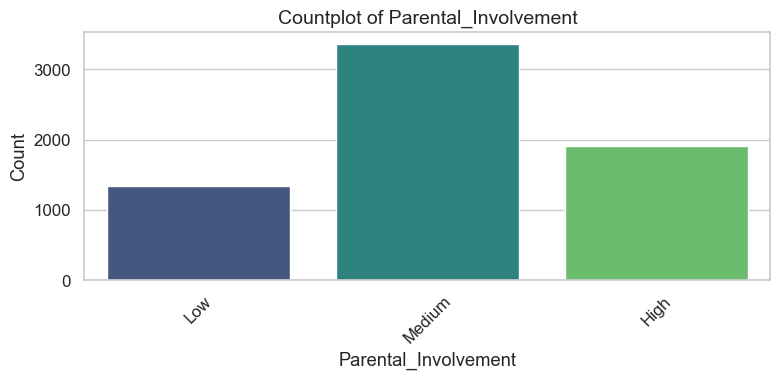

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


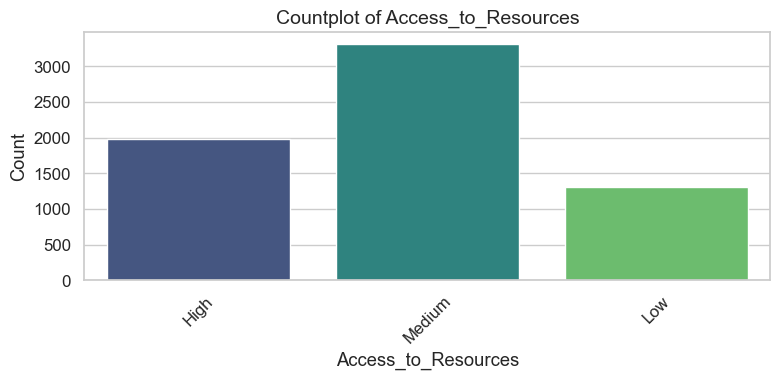

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


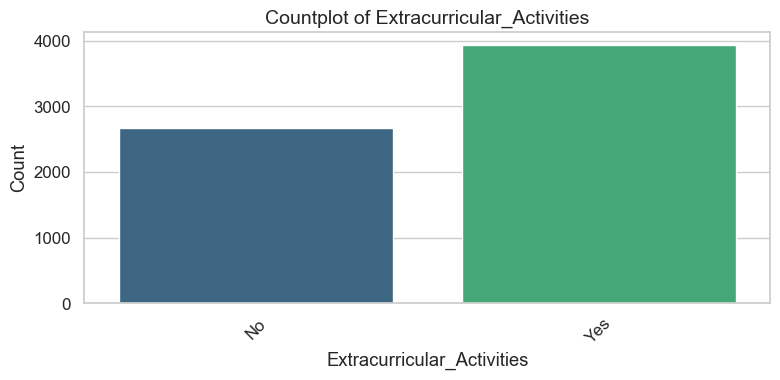

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


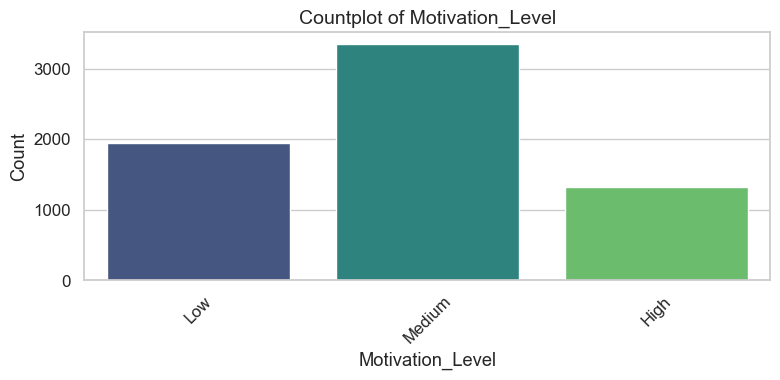

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


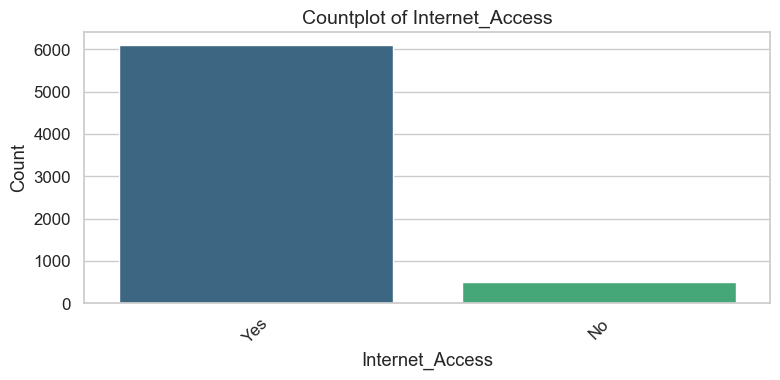

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


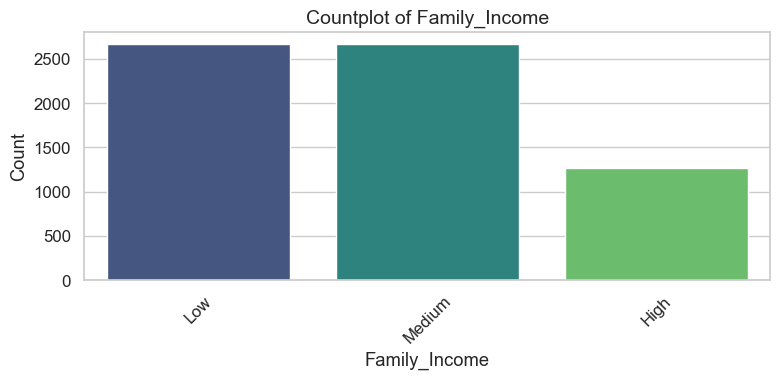

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


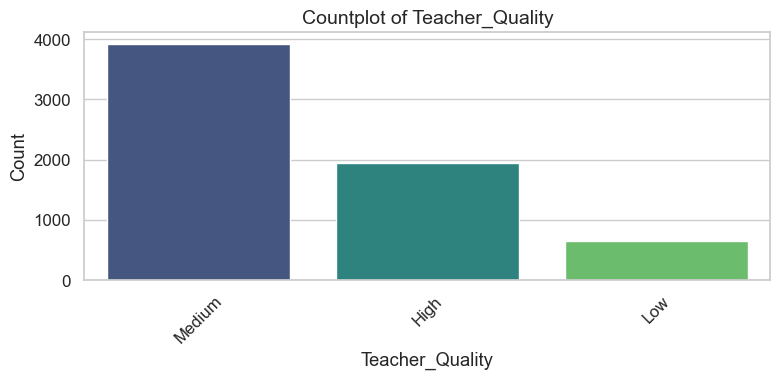

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


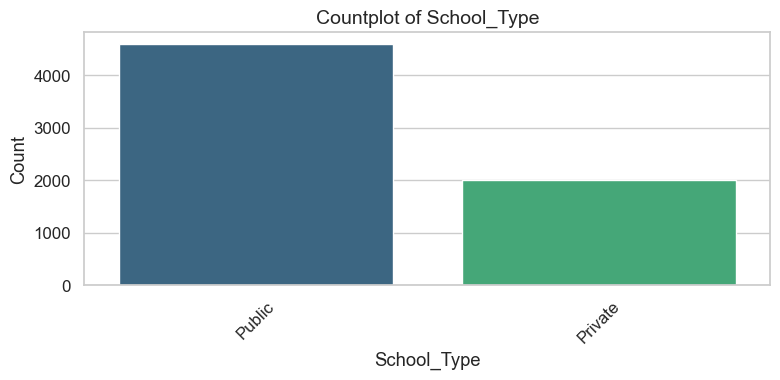

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


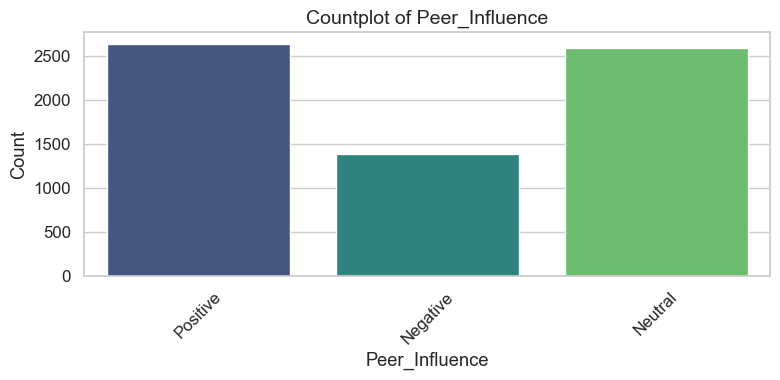

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


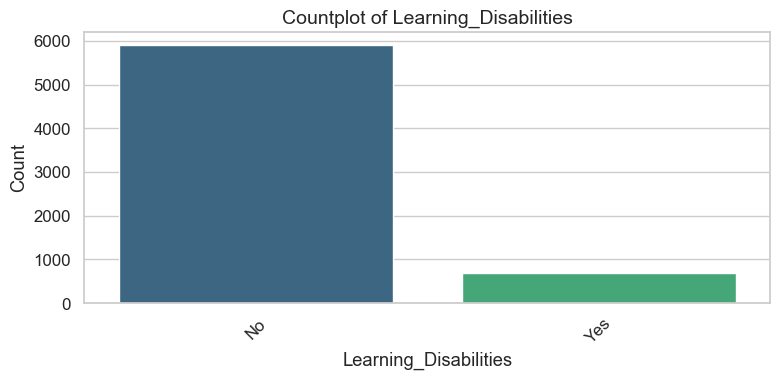

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


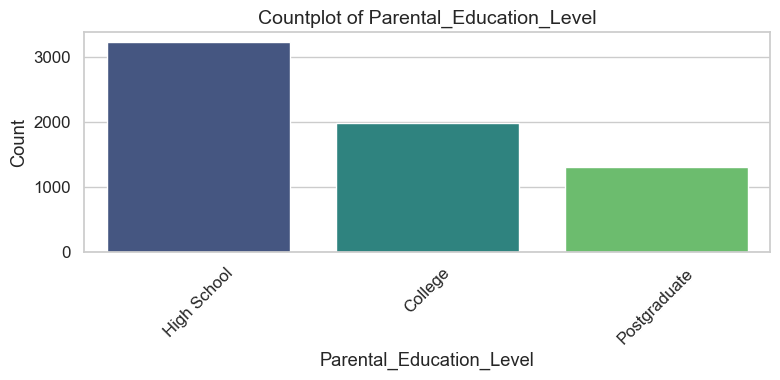

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


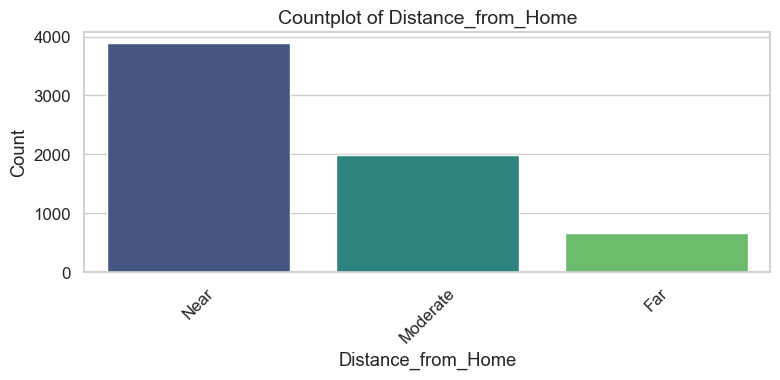

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\1788055291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


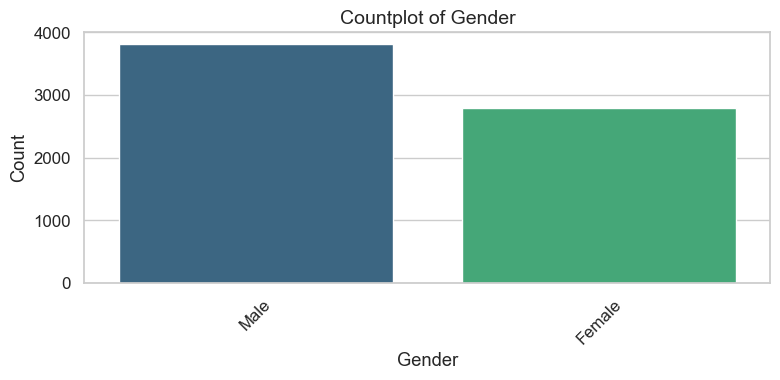

In [12]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Numerical Features vs Exam_Score

In [13]:
num_cols_no_target = [col for col in num_cols if col != 'Exam_Score']


In [14]:
corr = df[num_cols].corr()['Exam_Score'].sort_values(ascending=False)
corr

Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

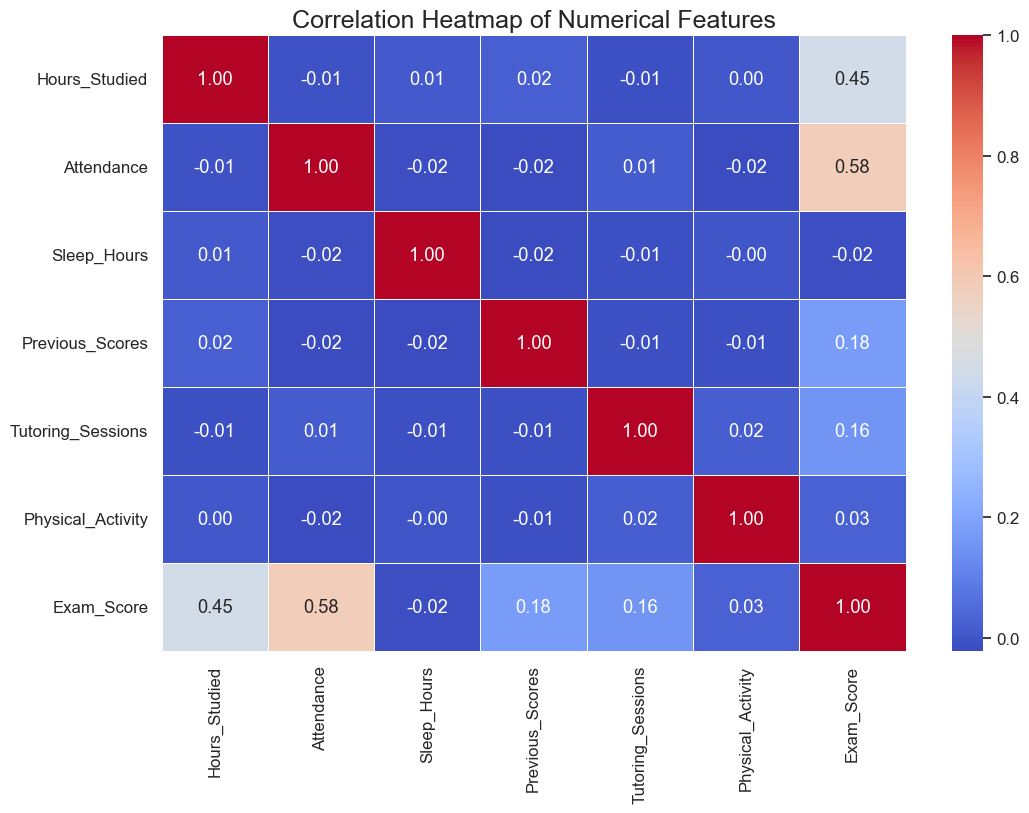

In [15]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=.5,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.show()


Categorical Features vs Exam Score

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


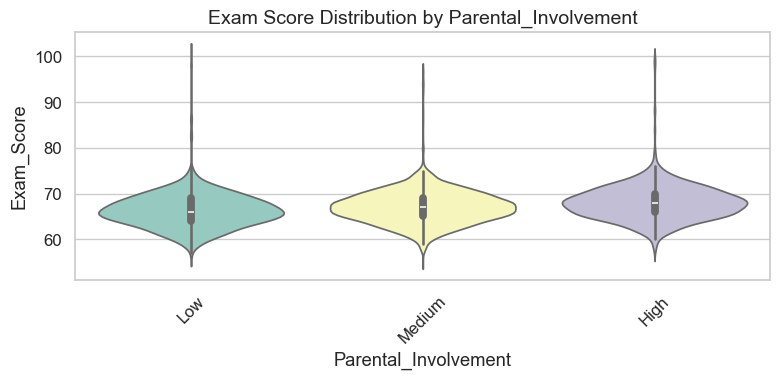

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


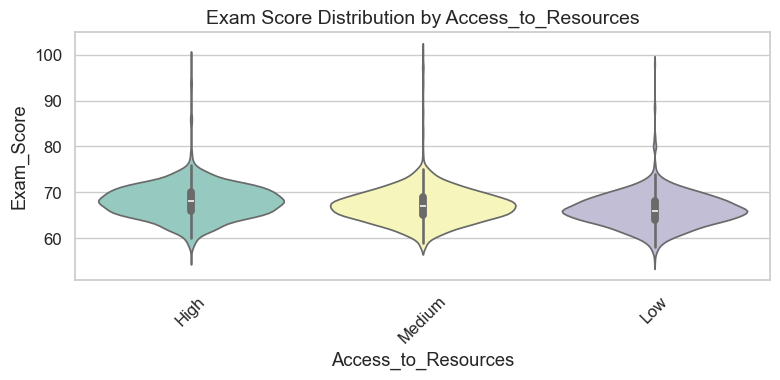

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


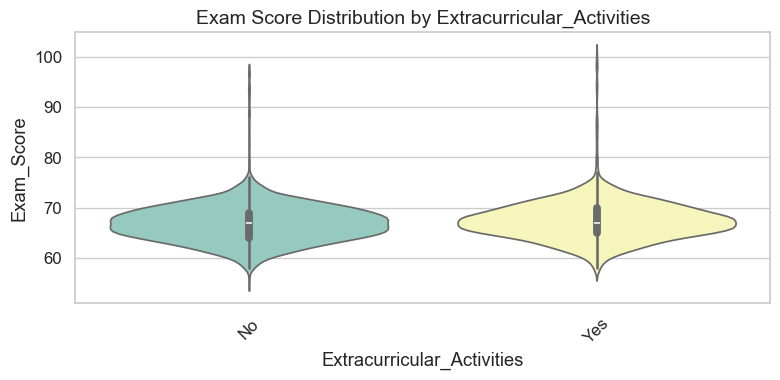

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


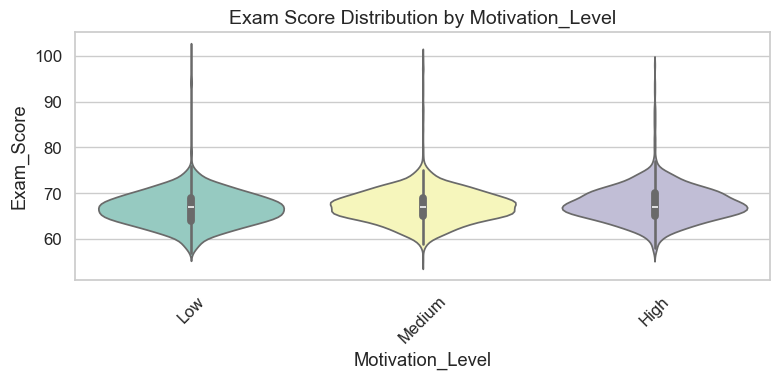

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


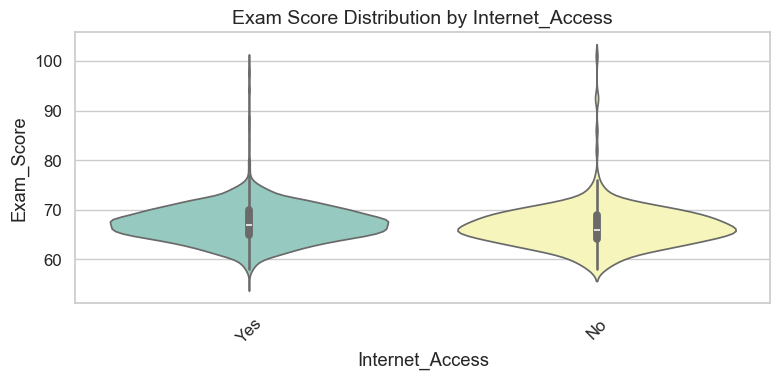

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


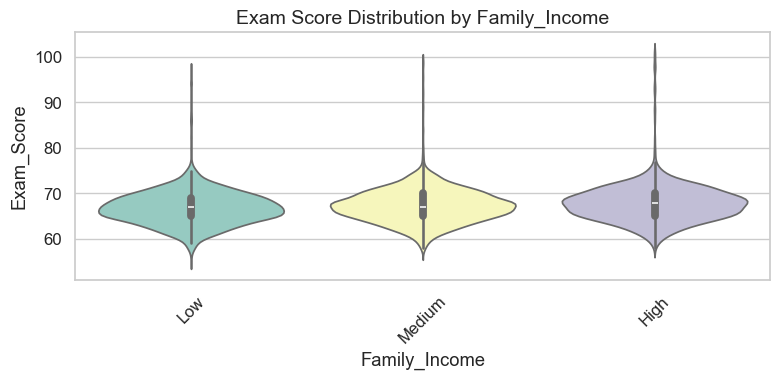

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


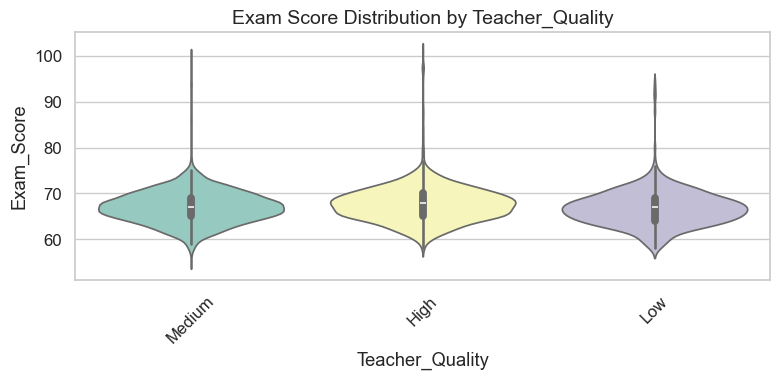

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


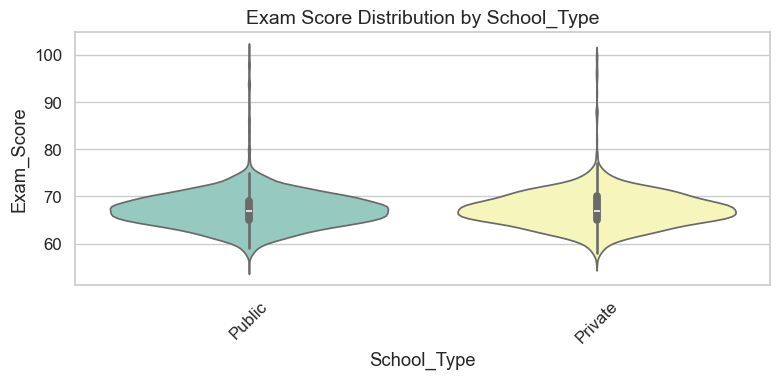

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


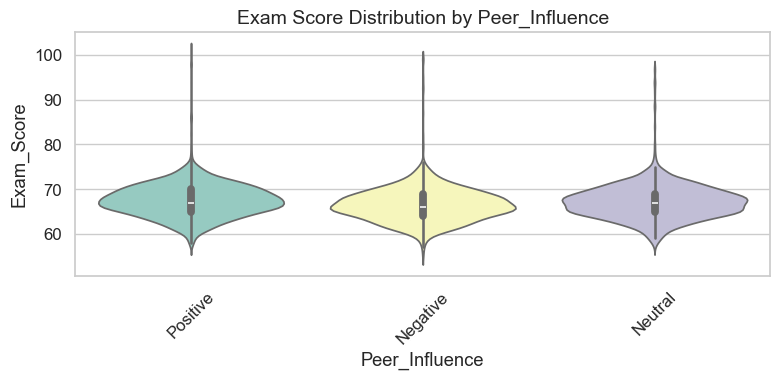

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


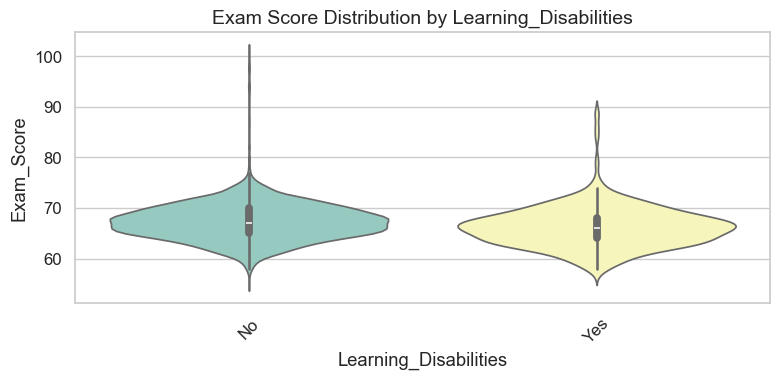

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


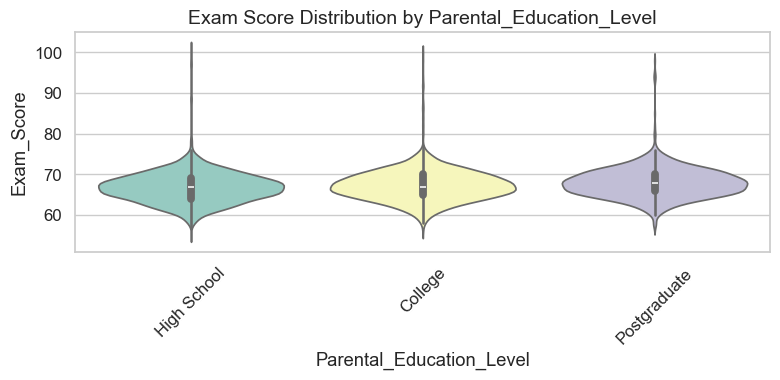

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


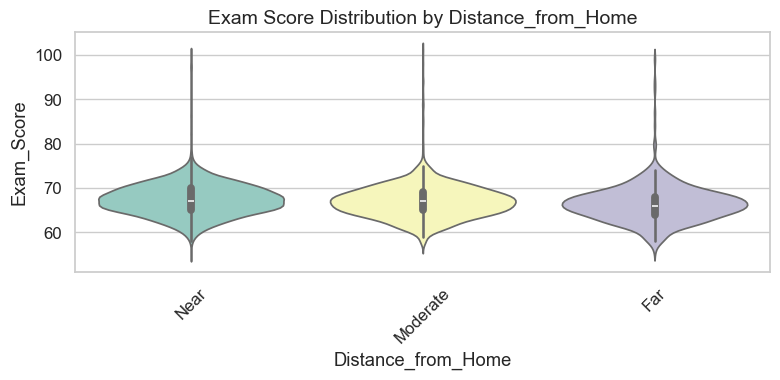

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\2754758417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')


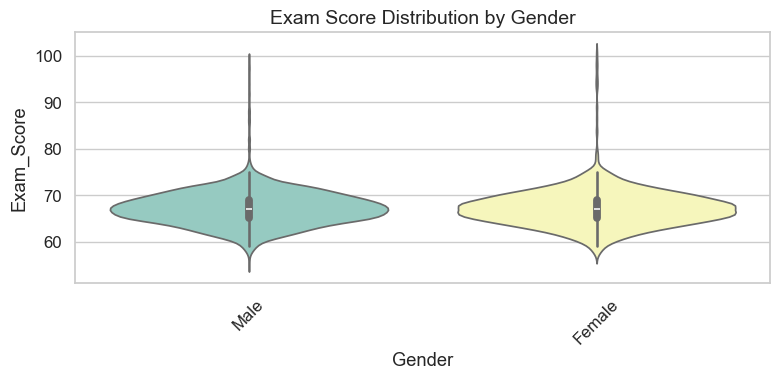

In [16]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.violinplot(data=df, x=col, y='Exam_Score', palette='Set3')
    plt.title(f"Exam Score Distribution by {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

df_mi = df.copy()

le = LabelEncoder()
for col in df_mi.select_dtypes(include='object').columns:
    df_mi[col] = le.fit_transform(df_mi[col])


In [18]:
from sklearn.feature_selection import mutual_info_regression

X = df_mi.drop('Exam_Score', axis=1)
y = df_mi['Exam_Score']

mi_scores = mutual_info_regression(X, y, random_state=0)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

mi_df


,Feature,MI_Score
1,Attendance,0.297904
0,Hours_Studied,0.172822
6,Previous_Scores,0.032091
3,Access_to_Resources,0.028363
9,Tutoring_Sessions,0.020721
11,Teacher_Quality,0.017115
2,Parental_Involvement,0.014010
16,Parental_Education_Level,0.011197
10,Family_Income,0.010594
15,Learning_Disabilities,0.009640


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\108905585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mi_df, x='MI_Score', y='Feature', palette='viridis')


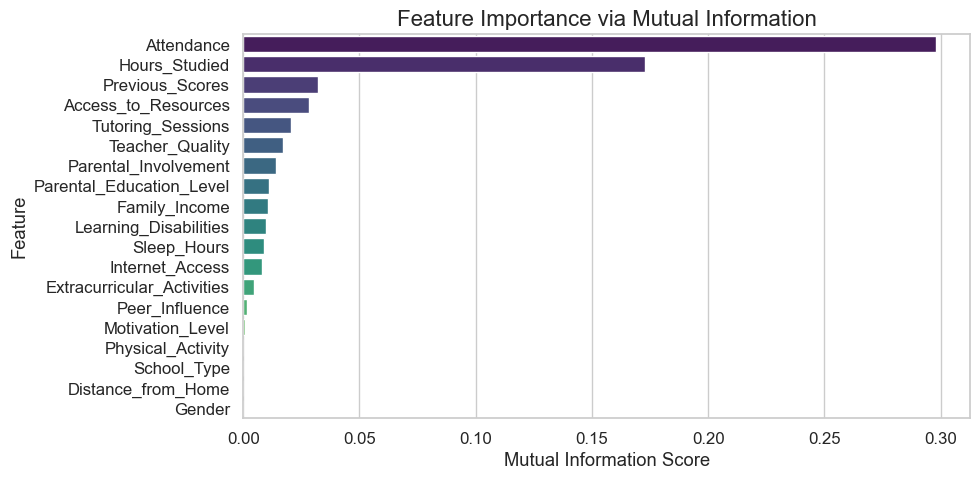

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(data=mi_df, x='MI_Score', y='Feature', palette='viridis')
plt.title("Feature Importance via Mutual Information", fontsize=16)
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


 ## PREPROCESSING & MODELLING

In [20]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. FEATURE GROUPS
numeric_cols = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
    'Tutoring_Sessions', 'Physical_Activity'
]

binary_cols = [
    'Extracurricular_Activities', 'Internet_Access', 'School_Type',
    'Learning_Disabilities', 'Gender'
]

ordinal_cols = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality',
    'Parental_Education_Level', 'Distance_from_Home'
]

nominal_cols = ['Peer_Influence']

# 2. BINARY ENCODING MAP

binary_map = {
    'Yes': 1, 'No': 0,
    'Private': 1, 'Public': 0,
    'Male': 1, 'Female': 0
}

df[binary_cols] = df[binary_cols].replace(binary_map)

# 3. ORDINAL CATEGORY ORDER
ordinal_categories = [
    ['Low', 'Medium', 'High'],                     # Parental_Involvement
    ['Low', 'Medium', 'High'],                     # Access_to_Resources
    ['Low', 'Medium', 'High'],                     # Motivation_Level
    ['Low', 'Medium', 'High'],                     # Family_Income
    ['Low', 'Medium', 'High'],                     # Teacher_Quality
    ['High School', 'College', 'Postgraduate'],    # Parental_Education_Level
    ['Near', 'Moderate', 'Far']                    # Distance_from_Home
]

# 4. PREPROCESSING PIPELINES
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("bin", "passthrough", binary_cols),
        ("ord", ordinal_pipeline, ordinal_cols),
        ("nom", nominal_pipeline, nominal_cols),
    ]
)

# 5. TRAIN TEST SPLIT
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 6. EVALUATION FUNCTION
def evaluate(model, X_test, y_test):
    pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, pred)),
        "R2": r2_score(y_test, pred)
    }


from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

# Pipeline untuk tuning
xgb_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        tree_method="hist",
        eval_metric="mae"
    ))
])

param_distributions = {
    "model__n_estimators": randint(200, 600),
    "model__learning_rate": uniform(0.01, 0.2),
    "model__max_depth": randint(2, 10),
    "model__subsample": uniform(0.5, 0.5),
    "model__colsample_bytree": uniform(0.5, 0.5),
    "model__gamma": uniform(0, 5),
    "model__min_child_weight": randint(1, 8),
}

random_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=30,
    cv=3,
    scoring="neg_mean_absolute_error",
    random_state=42,
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("\n=== BEST PARAMETERS ===")
print(random_search.best_params_)

print("\n=== BEST CV MAE ===")
print(-random_search.best_score_)

best_xgb_model = random_search.best_estimator_

final_results = evaluate(best_xgb_model, X_test, y_test)

print("\n=== FINAL TEST RESULTS (AFTER TUNING) ===")
print(final_results)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_21596\146607933.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace(binary_map)


Fitting 3 folds for each of 30 candidates, totalling 90 fits

=== BEST PARAMETERS ===
{'model__colsample_bytree': np.float64(0.5826334695315012), 'model__gamma': np.float64(0.07818203370596966), 'model__learning_rate': np.float64(0.09468029614127392), 'model__max_depth': 2, 'model__min_child_weight': 4, 'model__n_estimators': 335, 'model__subsample': np.float64(0.5027610585618012)}

=== BEST CV MAE ===
0.6411423881848654

=== FINAL TEST RESULTS (AFTER TUNING) ===
{'MAE': 0.5881279706954956, 'RMSE': np.float64(1.8604262129256417), 'R2': 0.7551349401473999}


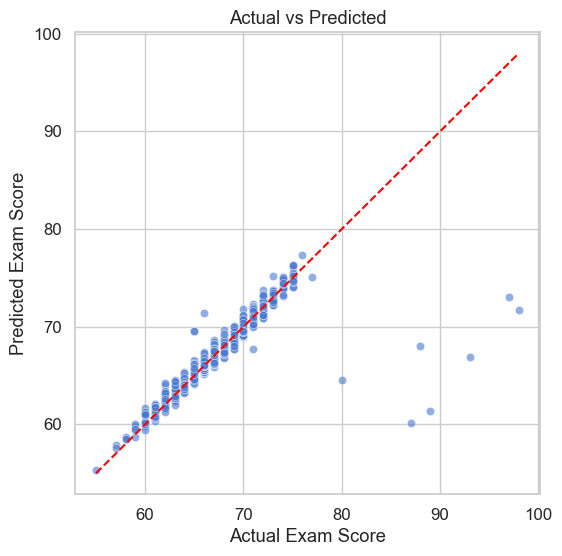

In [21]:
y_pred = best_xgb_model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.show()


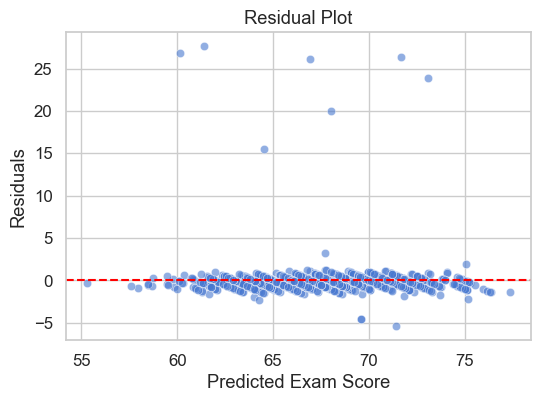

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Exam Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


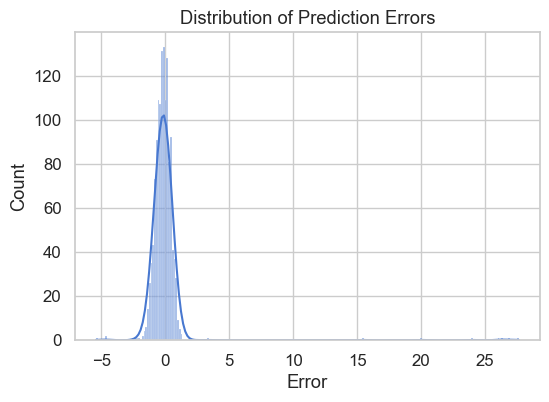

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.show()


In [24]:
# test case murid rajin
student_A = {
    "Hours_Studied": 40,
    "Attendance": 98,
    "Parental_Involvement": "High",
    "Access_to_Resources": "High",
    "Extracurricular_Activities": 1,
    "Sleep_Hours": 8,
    "Previous_Scores": 95,
    "Motivation_Level": "High",
    "Internet_Access": 1,
    "Tutoring_Sessions": 5,
    "Family_Income": "High",
    "Teacher_Quality": "High",
    "School_Type": 1,
    "Peer_Influence": "Positive",
    "Physical_Activity": 5,
    "Learning_Disabilities": 0,
    "Parental_Education_Level": "Postgraduate",
    "Distance_from_Home": "Near",
    "Gender": 1
}


In [25]:
# test case murid sangat malas
student_B = {
    "Hours_Studied": 2,
    "Attendance": 60,
    "Parental_Involvement": "Low",
    "Access_to_Resources": "Low",
    "Extracurricular_Activities": 0,
    "Sleep_Hours": 4,
    "Previous_Scores": 50,
    "Motivation_Level": "Low",
    "Internet_Access": 0,
    "Tutoring_Sessions": 0,
    "Family_Income": "Low",
    "Teacher_Quality": "Low",
    "School_Type": 0,
    "Peer_Influence": "Negative",
    "Physical_Activity": 1,
    "Learning_Disabilities": 1,
    "Parental_Education_Level": "High School",
    "Distance_from_Home": "Far",
    "Gender": 0
}


In [26]:
# test case murid average
student_C = {
    "Hours_Studied": 15,
    "Attendance": 80,
    "Parental_Involvement": "Medium",
    "Access_to_Resources": "Medium",
    "Extracurricular_Activities": 1,
    "Sleep_Hours": 7,
    "Previous_Scores": 70,
    "Motivation_Level": "Medium",
    "Internet_Access": 1,
    "Tutoring_Sessions": 2,
    "Family_Income": "Medium",
    "Teacher_Quality": "Medium",
    "School_Type": 0,
    "Peer_Influence": "Neutral",
    "Physical_Activity": 3,
    "Learning_Disabilities": 0,
    "Parental_Education_Level": "College",
    "Distance_from_Home": "Moderate",
    "Gender": 1
}


In [27]:
def predict_example(model, example_dict):
    example_df = pd.DataFrame([example_dict])
    return float(model.predict(example_df)[0])


In [28]:
prediction = predict_example(best_xgb_model, student_A)
print("Predicted Exam Score:", prediction)


Predicted Exam Score: 85.87956237792969


In [29]:
prediction = predict_example(best_xgb_model, student_B)
print("Predicted Exam Score:", prediction)


Predicted Exam Score: 52.92616653442383


In [30]:
prediction = predict_example(best_xgb_model, student_C)
print("Predicted Exam Score:", prediction)


Predicted Exam Score: 65.32304382324219


In [31]:
features = ["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Sleep_Hours", "Previous_Scores", "Motivation_Level", "Internet_Access", "Tutoring_Sessions", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Physical_Activity", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

In [32]:
import pickle 

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

    
import json 
with open('features.json', 'w') as f:
    json.dump(features, f)